#Deep Learning-Driven Speech Emotion Analysis

This project addresses the challenge of accurately
recognizing and classifying emotions from speech, aiming
to enhance mental health diagnostics and customer service
interactions. Leveraging a hybrid deep learning model
combining Convolutional Neural Networks (CNNs) and
Long Short-Term Memory (LSTM) networks, the study
utilizes the Ryerson Audio-Visual Database of Emotional
Speech and Song (RAVDESS). The model focuses on
extracting features from speech patterns while capturing
temporal dynamics crucial for understanding emotional
context. Advanced pre-processing techniques, supervised
learning with transfer learning, and comprehensive
evaluation metrics contribute to the project's methodology.
The primary goal is to develop a highly accurate and
reliable model applicable to real-world scenarios, with
outcomes poised to revolutionize practices in mental
health therapy and customer service interactions. The
project's deliverables include a fully trained deep learning
model and a detailed research report documenting the
methodology and results.

**Here are some library's we needed for this project:**

1. **Pandas (`import pandas as pd`):**
   - **Description:** Pandas is a powerful data manipulation library in Python. It provides data structures like DataFrame for efficient data handling and manipulation.

2. **NumPy (`import numpy as np`):**
   - **Description:** NumPy is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.

3. **Matplotlib (`import matplotlib.pyplot as plt`):**
   - **Description:** Matplotlib is a 2D plotting library for Python. It enables the creation of various types of plots and visualizations, essential for data exploration and analysis.

4. **Seaborn (`import seaborn as sns`):**
   - **Description:** Seaborn is a statistical data visualization library based on Matplotlib. It simplifies the process of creating informative and aesthetically pleasing statistical graphics.

5. **Librosa (`import librosa`):**
   - **Description:** Librosa is a Python package for music and audio analysis. It provides tools for feature extraction, time-series analysis, and visualization of audio data, making it suitable for tasks like speech emotion analysis.

6. **IPython Display (`import IPython.display as ipd`):**
   - **Description:** IPython Display provides tools for interactive computing in Python. In this project, it is used to play audio files directly within Jupyter Notebooks using `ipd.Audio()`.

7. **OS (`import os`):**
   - **Description:** The OS module provides a way to use operating system-dependent functionality, such as reading or writing to the file system. In this project, it is used for directory and file manipulation.

8. **Keras (`from keras.models import Sequential`):**
   - **Description:** Keras is a high-level neural networks API written in Python. It allows for easy and fast prototyping of deep learning models. In this project, it is used to define and train neural network models.

9. **Scikit-learn (`from sklearn.model_selection import train_test_split`):**
   - **Description:** Scikit-learn is a machine learning library in Python. It provides simple and efficient tools for data mining and data analysis. In this project, `train_test_split` is used to split the dataset into training and testing sets.

10. **Reshape (`from keras.layers import Reshape`):**
   - **Description:** Reshape is a layer in Keras used for reshaping the dimensions of input data. It is particularly useful when the shape of the data needs to be modified before passing it through subsequent layers.

These libraries collectively contribute to data preprocessing, feature extraction, model development, and result visualization in the project.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import os
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Reshape

In [ ]:
!pip install pydub

**Pydub (`from pydub import AudioSegment`):**
   - **Description:** Pydub is a Python library for audio processing. It simplifies various audio tasks, including loading, manipulating, and saving audio files. Pydub supports a variety of audio file formats and provides functionalities for tasks such as trimming, concatenating, and applying effects to audio. In this project, Pydub is used for loading audio files and extracting audio features.

In [ ]:
from pydub import AudioSegment

**Dataset Overview: Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)**

- **Description:**
  - The RAVDESS is an audio-visual database specifically designed for emotion recognition, containing speech audio-only files in 16-bit, 48kHz .wav format. The dataset is extensively described in an Open Access paper available in PLoS ONE.

- **File Composition:**
  - The dataset consists of 1440 files, resulting from 60 trials per actor for 24 professional actors (12 female, 12 male). Each actor vocalizes two lexically-matched statements in a neutral North American accent. Emotion expressions include calm, happy, sad, angry, fearful, surprise, and disgust, produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

- **File Naming Convention:**
  - Each file has a unique 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav) indicating various stimulus characteristics, such as modality, vocal channel, emotion, emotional intensity, statement, repetition, and actor.

- **Citation:**
  - The dataset should be cited using the following academic citation: Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. [DOI](https://doi.org/10.1371/journal.pone.0196391)

- **Access Link:**
  - [RAVDESS Kaggle Dataset](https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/audio_speech_actors_01-24
%ls

Mounted at /content/drive
/content/drive/MyDrive/audio_speech_actors_01-24
Actor_01/  Actor_04/  Actor_07/  Actor_10/  Actor_13/  Actor_16/  Actor_19/  Actor_22/
Actor_02/  Actor_05/  Actor_08/  Actor_11/  Actor_14/  Actor_17/  Actor_20/  Actor_23/
Actor_03/  Actor_06/  Actor_09/  Actor_12/  Actor_15/  Actor_18/  Actor_21/  Actor_24/


**Brief Explanation: Loading and Preprocessing RAVDESS Dataset**

1. **Define Dataset Path:**
   - The variable `RAVDESS` is set to the directory path where the RAVDESS dataset is stored. This path is the root directory containing audio and speech files for actors 01 to 24.

2. **Loading and Organizing Data:**
   - `os.listdir(RAVDESS)` retrieves the list of directories within the specified RAVDESS root directory.
   - `path_list` and `emotion_list` are initialized to collect file paths and corresponding emotions.

3. **Emotion Dictionary:**
   - An `emotion_dic` is defined to map numeric codes in the file names to emotion labels. For example, code '03' corresponds to 'happy'.

4. **Loop through Directories and Files:**
   - Nested loops iterate through each actor's directory and the audio files within.
   - For each audio file, the code extracts relevant information from the filename, particularly the emotion code.
   - If the emotion code is present in the defined dictionary, the file path and mapped emotion label are added to the respective lists.

5. **Create DataFrame:**
   - The collected paths and emotions are used to create a Pandas DataFrame named `df`. The DataFrame has two columns, 'path' and 'emotion', storing the file paths and corresponding emotion labels.

**Note:** This code segment is a crucial step in preparing the dataset for subsequent processing, providing an organized structure for efficient handling of audio files and their associated emotions.

In [ ]:
# Define the directory path for the RAVDESS dataset
RAVDESS = '/content/drive/MyDrive/audio_speech_actors_01-24'

# Rest of your code for data loading and preprocessing
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
emotion_list = []

# Define the emotion dictionary
emotion_dic = {
    '03': 'happy',
    '01': 'neutral',
    '04': 'sad',
    '05': 'angry',
    '06': 'fear',
    '07': 'disgust',
}

# Loop through the directories and audio files to collect paths and emotions
for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            path_list.append(os.path.join(RAVDESS, directory, audio_file))
            emotion_list.append(emotion_dic[key])

# Create a DataFrame
df = pd.DataFrame({
    'path': path_list,
    'emotion': emotion_list
})

**Audio Preprocessing Function**

1. **Function Purpose:**
   - The function `preprocess_audio` is designed to preprocess audio data from a given file path.

2. **Function Parameters:**
   - `path`: The input parameter representing the file path of the audio file to be processed.

3. **Processing Steps:**
   - `librosa.load(path)`: Utilizes the librosa library to load the audio file, returning the audio waveform (`samples`) and the sample rate (`sr`).
   - `AudioSegment.from_file(path)`: Uses the pydub library to create an AudioSegment object from the audio file.
   - `raw_audio.get_array_of_samples()`: Extracts the raw audio samples from the AudioSegment object.
   - `librosa.effects.trim(samples, top_db=25)`: Trims silent sections from the audio based on a dB threshold.
   - `np.pad(trimmed, (0, 180000 - len(trimmed)), 'constant')`: Pads or truncates the trimmed audio to a fixed length of 180,000 samples.

4. **Function Output:**
   - The function returns the preprocessed audio data in the form of a padded or truncated array (`padded`) and the sample rate (`sr`).

**Note:** This function is crucial for preparing the raw audio data before further feature extraction or analysis. It addresses issues such as trimming silence, ensuring a consistent length, and obtaining a standardized representation for subsequent processing in machine learning models.

In [ ]:
# Define a function to preprocess audio
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)

    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000 - len(trimmed)), 'constant')
    return padded, sr

In [ ]:
# Encoding dictionary for emotions
emotion_dict = {
    'neutral': 0,
    'happy': 1,
    'sad': 2,
    'angry': 3,
    'fear': 4,
    'disgust': 5
}

# Function to encode emotion labels
def encode(label):
    return emotion_dict.get(label)

**Feature Extraction from Audio**

1. **Purpose:**
   - The code extracts audio features, namely Zero Crossing Rate (ZCR), Root Mean Square (RMS), and Mel-frequency Cepstral Coefficients (MFCCs), from the preprocessed audio data.

2. **Feature Extraction Steps:**
   - **Zero Crossing Rate (ZCR):**
     - `librosa.feature.zero_crossing_rate`: Computes the rate of zero-crossings in the audio signal.
   - **Root Mean Square (RMS):**
     - `librosa.feature.rms`: Computes the Root Mean Square energy of the audio signal.
   - **Mel-frequency Cepstral Coefficients (MFCCs):**
     - `librosa.feature.mfcc`: Computes the MFCCs, capturing the spectral characteristics of the audio.

3. **Data Lists:**
   - `zcr_list`, `rms_list`, and `mfccs_list`: Lists to store the extracted features for each audio file.
   - `emotion_list`: List to store the encoded emotion labels corresponding to each audio file.

4. **Processing Loop:**
   - Iterates through each row of the DataFrame (`df`) containing audio file paths and emotions.
   - Calls the `preprocess_audio` function to obtain the preprocessed audio data.
   - If the audio data is valid, computes ZCR, RMS, and MFCCs, and appends them to the respective lists.
   - Encodes the emotion label and appends it to the `emotion_list`.
   - Handles exceptions and prints errors if encountered during the process.

5. **Conversion to Arrays:**
   - Converts the lists (`zcr_list`, `rms_list`, `mfccs_list`, `emotion_list`) to NumPy arrays (`zcr_array`, `rms_array`, `mfccs_array`, `emotion_array`).

6. **Data Shapes:**
   - Prints the shapes of the extracted feature arrays to provide insights into the dataset's structure.

**Note:** These extracted features serve as input for training machine learning models to recognize emotional states in speech. The shape of the arrays is crucial for ensuring compatibility with the chosen model architecture.

In [ ]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try:
        y, sr = preprocess_audio(row.path)

        # Ensure that y and sr are valid
        if y is not None and sr is not None:
            zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
            rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

            # Append features to lists
            zcr_list.append(zcr)
            rms_list.append(rms)
            mfccs_list.append(mfccs)

            emotion_list.append(encode(row.emotion))
        else:
            print(f"Audio file {row.path} couldn't be loaded or processed.")
    except Exception as e:
        print(f"Error processing audio at path: {row.path}, Error: {e}")


# Convert lists to arrays
zcr_array = np.array(zcr_list)
rms_array = np.array(rms_list)
mfccs_array = np.array(mfccs_list)
emotion_array = np.array(emotion_list)

print(f"ZCR array shape: {zcr_array.shape}")
print(f"RMS array shape: {rms_array.shape}")
print(f"MFCCs array shape: {mfccs_array.shape}")
print(f"Emotion array shape: {emotion_array.shape}")

Error processing audio at path: /content/drive/MyDrive/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav, Error: index can't contain negative values
ZCR array shape: (1056, 1, 352)
RMS array shape: (1056, 1, 352)
MFCCs array shape: (1056, 13, 352)
Emotion array shape: (1056,)


In [ ]:
print(np.shape(zcr_list))  # Check the shape of zcr_list
print(np.shape(rms_list))  # Check the shape of rms_list
print(np.shape(mfccs_list))  # Check the shape of mfccs_list

(1056, 1, 352)
(1056, 1, 352)
(1056, 13, 352)


**Data Transformation and Splitting**

1. **Concatenation of Feature Arrays:**
   - Combines the extracted feature arrays (`zcr_list`, `rms_list`, `mfccs_list`) into a single feature array (`X`) along the third axis.
   - Utilizes `np.swapaxes` to ensure the correct shape compatibility for concatenation.
   - The resulting array `X` has dimensions representing time, features, and different types of features.

2. **Data Type Conversion:**
   - Converts the data type of the feature array (`X`) to 'float32' to ensure compatibility with neural network models.

3. **Label Transformation:**
   - Converts the emotion labels (`emotion_list`) to a NumPy array (`y`) and expands its dimensions along the second axis.
   - The labels are encoded as integers (`int8`) to match the model's output format.

4. **Train-Validation-Test Split:**
   - Splits the dataset into training, validation, and test sets using the `train_test_split` function.
   - The initial split (`train_test_split(X, y, test_size=0.12, random_state=1)`) separates training data from the rest.
   - The subsequent split (`train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)`) divides the remaining data into validation and test sets.

**Note:** The transformed feature array (`X`) and corresponding label array (`y`) are now ready for training and evaluating machine learning models, particularly neural networks for speech emotion recognition. The splitting ensures separate datasets for model training, validation, and final evaluation.

In [ ]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2),
    np.swapaxes(rms_list, 1, 2),
    np.swapaxes(mfccs_list, 1, 2)),
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')
#y = to_categorical(emotion_list, num_classes=6)


# Split data into features and labels
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)


**Recurrent Neural Network (RNN)**

- **Model Type:** Sequential

**Architecture:**

1. **LSTM Layer (1st):**
   - Number of Units: 64
   - Return Sequences: True (used for stacking LSTM layers)
   - Input Shape: (Number of Time Steps, Number of Features)
   - Output Shape: (None, 352, 64)
   - Parameters: 20,480

2. **LSTM Layer (2nd):**
   - Number of Units: 128
   - Return Sequences: True
   - Output Shape: (None, 352, 128)
   - Parameters: 98,816

3. **Global Average Pooling1D Layer:**
   - Output Shape: (None, 128)
   - Parameters: 0 (No trainable parameters)

4. **Dense Layer:**
   - Units: 128
   - Activation Function: ReLU
   - Output Shape: (None, 128)
   - Parameters: 16,512

5. **Dropout Layer:**
   - Rate: 0.5 (50% dropout)
   - Output Shape: (None, 128)

6. **Dense Layer (Output Layer):**
   - Units: 6 (Number of Classes)
   - Activation Function: Softmax
   - Output Shape: (None, 6)
   - Parameters: 774

- **Compilation:**
  - **Loss Function:** Categorical Crossentropy
  - **Optimizer:** RMSProp
  - **Metrics:** Accuracy

- **Model Summary:**
  - Total Parameters: 136,582 (533.52 KB)
  - Trainable Parameters: 136,582 (533.52 KB)
  - Non-trainable Parameters: 0

**Note:**
- The model is designed for multiclass classification with 6 emotion classes.
- Two LSTM layers are employed to capture sequential patterns in the input data.
- Global Average Pooling1D is used to reduce the spatial dimensions and retain essential information.
- The model includes a dropout layer for regularization to prevent overfitting.
- The model aims to optimize parameters during training for accurate emotion recognition.

In [ ]:
from keras.layers import LSTM

model_rnn = Sequential()
model_rnn.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model_rnn.add(LSTM(128, return_sequences=True))
model_rnn.add(GlobalAveragePooling1D())
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(6, activation='softmax'))

model_rnn.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
print(model_rnn.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 352, 64)           20480     
                                                                 
 lstm_1 (LSTM)               (None, 352, 128)          98816     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
# Convert labels to categorical for training and validation
y_train_categorical = to_categorical(y_train, num_classes=6)
y_val_categorical = to_categorical(y_val, num_classes=6)

In [ ]:
print(f"Shape of y_train_categorical: {y_train_categorical.shape}")
print(f"Shape of y_val_categorical: {y_val_categorical.shape}")


Shape of y_train_categorical: (929, 6)
Shape of y_val_categorical: (88, 6)


In [ ]:
print(f"Data type of y_train_categorical: {y_train_categorical.dtype}")
print(f"Data type of y_val_categorical: {y_val_categorical.dtype}")

Data type of y_train_categorical: float32
Data type of y_val_categorical: float32


In [ ]:
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_val: {np.unique(y_val)}")

Unique values in y_train: [0 1 2 3 4 5]
Unique values in y_val: [0 1 2 3 4 5]


In [ ]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Unique values in y_test: {np.unique(y_test)}")

Shape of y_test: (39, 1)
Unique values in y_test: [0 1 2 3 4 5]


Epoch 1/100
155/155 [==============================] - 70s 419ms/step - loss: 1.6154 - accuracy: 0.3036 - val_loss: 1.5276 - val_accuracy: 0.3523
Epoch 2/100
155/155 [==============================] - 59s 384ms/step - loss: 1.5339 - accuracy: 0.3305 - val_loss: 1.6448 - val_accuracy: 0.3295
Epoch 3/100
155/155 [==============================] - 60s 388ms/step - loss: 1.4966 - accuracy: 0.3692 - val_loss: 1.3881 - val_accuracy: 0.4545
Epoch 4/100
155/155 [==============================] - 59s 384ms/step - loss: 1.4339 - accuracy: 0.3940 - val_loss: 1.3620 - val_accuracy: 0.4659
Epoch 5/100
155/155 [==============================] - 57s 369ms/step - loss: 1.3786 - accuracy: 0.4381 - val_loss: 1.4066 - val_accuracy: 0.4091
Epoch 6/100
155/155 [==============================] - 60s 386ms/step - loss: 1.3282 - accuracy: 0.4543 - val_loss: 1.2495 - val_accuracy: 0.5000
Epoch 7/100
155/155 [==============================] - 64s 411ms/step - loss: 1.2528 - accuracy: 0.4833 - val_loss: 1.3367 -

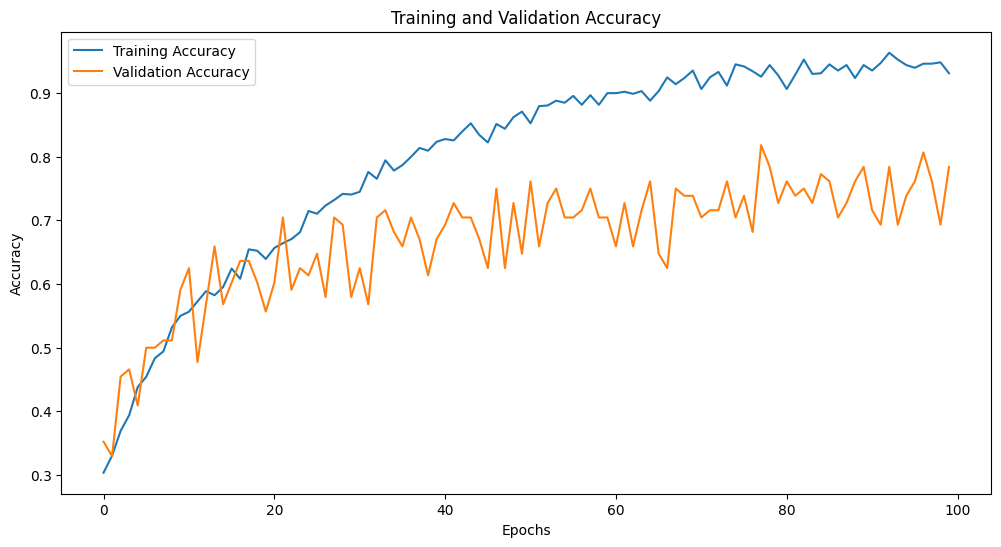

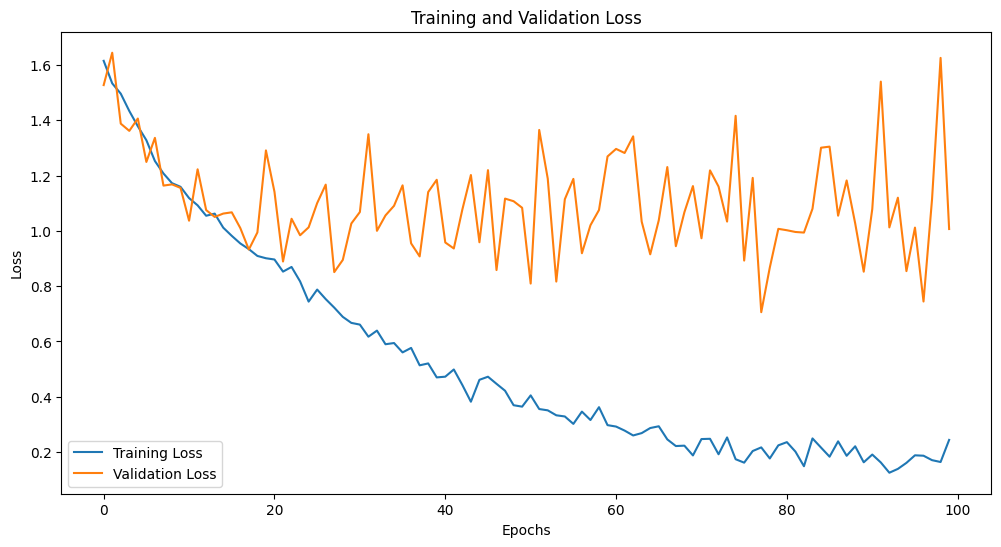

In [ ]:
# Train the model and collect the training history
history = model_rnn.fit(X_train, y_train_categorical, epochs=100, batch_size=6, validation_data=(X_val, y_val_categorical))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#!pip install tabulate

In [ ]:
from tabulate import tabulate
# Calculate Maximum Testing accuracy, Maximum Training accuracy, Minimum Training Loss, Minimum Testing Loss
max_val_acc = max(history.history['val_accuracy'])
max_accuracy = max(history.history['accuracy'])
min_loss = min(history.history['loss'])
min_val_loss = min(history.history['val_loss'])

# Create a list of lists containing the metric names and their values
table = [
    ["Maximum Testing accuracy:", f"\033[1;32m{max_val_acc:.4f}\033[0m"],
    ["Maximum Training accuracy:", f"\033[1;32m{max_accuracy:.4f}\033[0m"],
    ["Minimum Training Loss:", f"\033[1;31m{min_loss:.4f}\033[0m"],
    ["Minimum Testing Loss:", f"\033[1;31m{min_val_loss:.4f}\033[0m"]
]

# Print the table using tabulate, with "Metric" and "Value" as headers and "fancy_grid" as the table format
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒════════════════════════════╤═════════╕
│ Metric                     │   Value │
╞════════════════════════════╪═════════╡
│ Maximum Testing accuracy:  │  0.8182 │
├────────────────────────────┼─────────┤
│ Maximum Training accuracy: │  0.9634 │
├────────────────────────────┼─────────┤
│ Minimum Training Loss:     │  0.125  │
├────────────────────────────┼─────────┤
│ Minimum Testing Loss:      │  0.7059 │
╘════════════════════════════╧═════════╛


# *Saving the Model*

In [ ]:
model_rnn.save("emotion_rnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_rnn.save("emotion_rnn.model")